## Importing Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics  
import math
from keras import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Preparing X and Y

In [2]:
data = pd.read_csv('./miningdata.csv', index_col=False)
data.head()

,Unnamed: 0,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Floatation Column Air Flow Mean,Floatation Column Air Flow Median,Floatation Column Level Mean,Floatation Column Level Median,% Iron Concentrate,% Silica Concentrate
0,0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.090000,250.884,461.548429,446.370,66.91,1.31
1,1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.534286,250.532,457.548000,448.086,66.91,1.31
2,2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.120000,250.313,456.467000,451.240,66.91,1.31
3,3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.359714,251.147,448.064429,446.210,66.91,1.31
4,4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.663000,250.203,448.784714,452.441,66.91,1.31


In [3]:
X = data[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Floatation Column Air Flow Mean', 'Floatation Column Air Flow Median', 'Floatation Column Level Mean', 'Floatation Column Level Median']]
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Floatation Column Air Flow Mean,Floatation Column Air Flow Median,Floatation Column Level Mean,Floatation Column Level Median
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.090000,250.884,461.548429,446.370
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.534286,250.532,457.548000,448.086
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.120000,250.313,456.467000,451.240
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.359714,251.147,448.064429,446.210
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.663000,250.203,448.784714,452.441


In [4]:
Y = data[['% Silica Concentrate']]
Y.head()

,% Silica Concentrate
0,1.31
1,1.31
2,1.31
3,1.31
4,1.31


In [5]:
def normalize_x(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11):
    Z = []
    x1min, x2min, x3min, x4min, x5min, x6min, x7min, x8min, x9min, x10min, x11min = np.amin(X1), np.amin(X2), np.amin(X3), np.amin(X4), np.amin(X5), np.amin(X6), np.amin(X7), np.amin(X8), np.amin(X9), np.amin(X10), np.amin(X11)
    x1max, x2max, x3max, x4max, x5max, x6max, x7max, x8max, x9max, x10max, x11max = np.amax(X1), np.amax(X2), np.amax(X3), np.amax(X4), np.amax(X5), np.amax(X6), np.amax(X7), np.amax(X8), np.amax(X9), np.amax(X10), np.amax(X11)
    d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11 = x1max-x1min, x2max-x2min, x3max-x3min, x4max-x4min, x5max-x5min, x6max-x6min, x7max-x7min, x8max-x8min, x9max-x9min, x10max-x10min, x11max-x11min
    for i in range(len(X1)):
        q1 = (X1[i] - x1min)/d1
        q2 = (X2[i] - x2min)/d2
        q3 = (X3[i] - x3min)/d3
        q4 = (X4[i] - x4min)/d4
        q5 = (X5[i] - x5min)/d5
        q6 = (X6[i] - x6min)/d6
        q7 = (X7[i] - x7min)/d7
        q8 = (X8[i] - x8min)/d8
        q9 = (X9[i] - x9min)/d9
        q10 = (X10[i] - x10min)/d10
        q11 = (X11[i] - x11min)/d11
        Z.append([q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11])
    Z = np.asarray(Z)
    return Z

In [6]:
Xn = normalize_x(X[['% Iron Feed'][0]], X[['% Silica Feed'][0]], X[['Starch Flow'][0]], X[['Amina Flow'][0]], X[['Ore Pulp Flow'][0]], X[['Ore Pulp pH'][0]], X[['Ore Pulp Density'][0]], X[['Floatation Column Air Flow Mean'][0]], X[['Floatation Column Air Flow Median'][0]], X[['Floatation Column Level Mean'][0]], X[['Floatation Column Level Median'][0]])
print(Xn[0:5])

[[0.54079861 0.48831412 0.47927281 0.6342331  0.45914323 0.63903327
  0.6603485  0.41620084 0.40352078 0.42015646 0.51605798]
 [0.54079861 0.48831412 0.48004739 0.64735101 0.49853746 0.63942261
  0.6603485  0.41124086 0.40125811 0.41200273 0.5193476 ]
 [0.54079861 0.48831412 0.48307109 0.65556401 0.55243914 0.63981195
  0.6603485  0.40754319 0.39985037 0.40979942 0.5253939 ]
 [0.54079861 0.48831412 0.48369011 0.65679124 0.51165314 0.64024996
  0.6603485  0.41860815 0.40521136 0.39267319 0.51575125]
 [0.54079861 0.48831412 0.48152035 0.63570538 0.5662625  0.6406393
  0.6603485  0.41238969 0.39914328 0.39414129 0.52769625]]


In [7]:
def normalize_y(Y):
    Z = []
    ymin = np.amin(Y)
    ymax = np.amax(Y)
    d = ymax - ymin
    for i in range(len(Y)):
        Z.append((Y[i] - ymin)/d)
    Z = np.asarray(Z)
    return Z

In [8]:
Yn = normalize_y(Y[['% Silica Concentrate'][0]])
print(Yn[0:5])

[0.14401623 0.14401623 0.14401623 0.14401623 0.14401623]


In [9]:
X_train, X_test, Y_train, Y_test =  train_test_split(Xn, Yn, test_size=0.20, shuffle=True)

In [10]:
# reshaping X to [samples, timestamps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(f"X_train shape is: {X_train.shape}, X_test shape is: {X_test.shape}, Y_train shape is: {Y_train.shape}, Y_test shape is: {Y_test.shape}")

X_train shape is: (589962, 1, 11), X_test shape is: (147491, 1, 11), Y_train shape is: (589962,), Y_test shape is: (147491,)


## Training and Testing RNN Network (Using LSTM Layers)

In [11]:
M = Sequential()
M.add(LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
M.add(LSTM(32))
M.add(Dense(16, activation='relu'))
M.add(Dense(1))

print(M.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             19456     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,417
Trainable params: 32,417
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
Ymax = np.amax(Y[['% Silica Concentrate'][0]]) 
Ymin = np.amin(Y[['% Silica Concentrate'][0]])
D = Ymax - Ymin

In [13]:
def rev_normalize(pr):
    Z = []
    for i in range(len(pr)):
        Z.append((pr[i]*D)+Ymin)
    Z = np.asarray(Z)
    return Z

In [14]:
M.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
h = M.fit(X_train, Y_train, epochs=15, batch_size=500, verbose=1, validation_split=0.2)

Epoch 1/15
944/944 [==============================] - 12s 8ms/step - loss: 0.1675 - mean_squared_error: 0.0518 - val_loss: 0.1610 - val_mean_squared_error: 0.0491
Epoch 2/15
944/944 [==============================] - 7s 7ms/step - loss: 0.1596 - mean_squared_error: 0.0471 - val_loss: 0.1585 - val_mean_squared_error: 0.0451
Epoch 3/15
944/944 [==============================] - 6s 7ms/step - loss: 0.1572 - mean_squared_error: 0.0458 - val_loss: 0.1555 - val_mean_squared_error: 0.0456
Epoch 4/15
944/944 [==============================] - 6s 7ms/step - loss: 0.1546 - mean_squared_error: 0.0448 - val_loss: 0.1522 - val_mean_squared_error: 0.0439
Epoch 5/15
944/944 [==============================] - 6s 7ms/step - loss: 0.1511 - mean_squared_error: 0.0436 - val_loss: 0.1490 - val_mean_squared_error: 0.0427
Epoch 6/15
944/944 [==============================] - 6s 7ms/step - loss: 0.1479 - mean_squared_error: 0.0424 - val_loss: 0.1459 - val_mean_squared_error: 0.0411
Epoch 7/15
944/944 [=======

In [15]:
import sklearn.metrics as metrics

p = M.predict(X_test)
P = rev_normalize(p)

yt = rev_normalize(Y_test)

# Accuracy evaluation
A = sklearn.metrics.mean_absolute_error(Y_test, p)           # Best possibe result would be 0.0
print("Accuracy is:", A)

np.set_printoptions(suppress=True)

# Printing results
print("Predictions:")
print(P[0:20])
print("Expected values:")
print(yt[0:20])

Accuracy is: 0.1347445813776819
Predictions:
[[1.7704066]
 [3.427493 ]
 [2.2337966]
 [1.5383399]
 [2.2426994]
 [1.7622743]
 [2.5662723]
 [3.6057725]
 [2.5390034]
 [3.2132602]
 [2.8610191]
 [1.074505 ]
 [1.7776906]
 [2.3089938]
 [1.3357449]
 [1.8226047]
 [1.4329405]
 [2.1281722]
 [2.0673943]
 [3.7522182]]
Expected values:
[1.62       3.1        2.35       1.4        3.12       4.32
 3.52       4.40188366 1.21       1.48       1.72       1.08
 1.62       1.98       2.97       2.1        1.67       2.4
 1.62       3.8255071 ]


## Plotting Some Results

<Figure size 2160x1440 with 0 Axes>

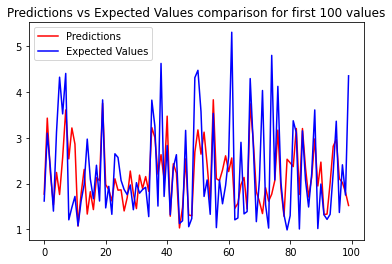

<Figure size 2160x1440 with 0 Axes>

In [18]:
L = range(100)
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),1):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L, P[0:100], 'r', label="Predictions")
plt.plot(L, yt[0:100], 'b', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 100 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

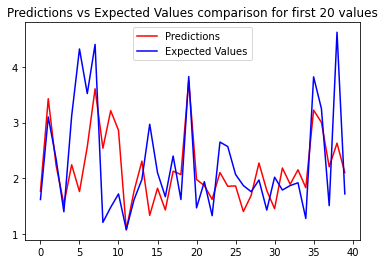

<Figure size 2160x1440 with 0 Axes>

In [19]:
L = range(40)
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),1):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L, P[0:40], 'r', label="Predictions")
plt.plot(L, yt[0:40], 'b', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 20 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))